# PHASE3 PROJECT NOTEBOOK

![image](https://github.com/gibwanjau0/Chicago-Car-Crash-Project/blob/main/images/istockphoto-451333971-612x612.jpg)

# DATA UNDERSTANDING

In [1]:
#importing the relevant libraries 

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, r2_score, recall_score, precision_score, roc_curve, roc_auc_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, plot_roc_curve 
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler

from sklearn.compose import ColumnTransformer

#!pip install shap
#import shap 
#shap.initjs()

#import six
#import sys
#sys.modules['sklearn.externals.six'] = six
from imblearn.over_sampling import SMOTE, ADASYN, SMOTENC

#import folium 

import warnings
warnings.filterwarnings('ignore')

In [2]:
#import our datasete 
crashes_data = pd.read_csv('Traffic_Crashes_Crashes.csv')
people_dataset = pd.read_csv('Traffic_Crashes_People.csv')

In [3]:
#making an observation of tha crashes dataset outlook
crashes_data.head(5)

,CRASH_RECORD_ID,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,JC199149,NaN,03/25/2019 02:43:00 PM,30.0,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,...,0.0,1.0,2.0,0.0,14.0,2.0,3.0,41.884547,-87.641201,POINT (-87.64120093714 41.884547224337)
1,792b539deaaad65ee5b4a9691d927a34d298eb33d42af0...,JB422857,NaN,09/05/2018 08:40:00 AM,30.0,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,...,0.0,0.0,2.0,0.0,8.0,4.0,9.0,41.968562,-87.740659,POINT (-87.740659314632 41.968562453871)
2,0115ade9a755e835255508463f7e9c4a9a0b47e9304238...,JF318029,NaN,07/15/2022 12:45:00 AM,30.0,UNKNOWN,UNKNOWN,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,...,0.0,0.0,2.0,0.0,0.0,6.0,7.0,41.886336,-87.716203,POINT (-87.716203130599 41.886336409761)
3,05b1982cdba5d8a00e7e76ad1ecdab0e598429f78481d2...,JF378711,NaN,08/29/2022 11:30:00 AM,30.0,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,...,0.0,0.0,3.0,0.0,11.0,2.0,8.0,41.749348,-87.721097,POINT (-87.721096727406 41.749348170421)
4,017040c61958d2fa977c956b2bd2d6759ef7754496dc96...,JF324552,NaN,07/15/2022 06:50:00 PM,30.0,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,...,0.0,0.0,2.0,0.0,18.0,6.0,7.0,41.925111,-87.667997,POINT (-87.667997321599 41.925110815832)


In [4]:
#observing the first 5 rows on the people data
people_dataset.head(5)

,PERSON_ID,PERSON_TYPE,CRASH_RECORD_ID,RD_NO,VEHICLE_ID,CRASH_DATE,SEAT_NO,CITY,STATE,ZIPCODE,...,EMS_RUN_NO,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,PEDPEDAL_ACTION,PEDPEDAL_VISIBILITY,PEDPEDAL_LOCATION,BAC_RESULT,BAC_RESULT VALUE,CELL_PHONE_USE
0,O749947,DRIVER,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,JC451435,834816.0,09/28/2019 03:30:00 AM,NaN,CHICAGO,IL,60651,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
1,O871921,DRIVER,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,JD208731,827212.0,04/13/2020 10:50:00 PM,NaN,CHICAGO,IL,60620,...,NaN,NONE,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
2,O10018,DRIVER,71162af7bf22799b776547132ebf134b5b438dcf3dac6b...,HY484534,9579.0,11/01/2015 05:00:00 AM,NaN,NaN,NaN,NaN,...,NaN,IMPROPER BACKING,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
3,O10038,DRIVER,c21c476e2ccc41af550b5d858d22aaac4ffc88745a1700...,HY484750,9598.0,11/01/2015 08:00:00 AM,NaN,NaN,NaN,NaN,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
4,O10039,DRIVER,eb390a4c8e114c69488f5fb8a097fe629f5a92fd528cf4...,HY484778,9600.0,11/01/2015 10:15:00 AM,NaN,NaN,NaN,NaN,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN


In [5]:
#observing the shape of the crashes dataset
crashes_data.shape

(216969, 49)

In [6]:
#getting the shape pf the people dataset
people_dataset.shape

(676282, 30)

In [7]:
#general description of the crashes data
crashes_data.describe()

,POSTED_SPEED_LIMIT,LANE_CNT,STREET_NO,BEAT_OF_OCCURRENCE,NUM_UNITS,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE
count,216965.000000,62635.000000,216964.000000,216961.000000,216964.000000,216490.000000,216490.000000,216490.000000,216490.000000,216490.000000,216490.000000,216490.0,216964.000000,216964.000000,216964.000000,215477.000000,215477.000000
mean,28.344765,9.480961,3683.588909,1239.076991,2.034273,0.186979,0.001224,0.019909,0.105100,0.060746,2.003321,0.0,13.220944,4.124025,6.698268,41.854096,-87.672774
std,6.277091,1732.661806,2848.998700,704.981654,0.454870,0.559469,0.037638,0.162777,0.416915,0.317985,1.160133,0.0,5.560850,1.983865,3.321089,0.348189,0.709165
min,0.000000,0.000000,1.000000,111.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,1.000000,0.000000,-87.936193
25%,30.000000,2.000000,1242.000000,713.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,9.000000,2.000000,4.000000,41.780836,-87.721329
50%,30.000000,2.000000,3200.000000,1135.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,14.000000,4.000000,7.000000,41.874349,-87.673770
75%,30.000000,4.000000,5600.000000,1822.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,17.000000,6.000000,9.000000,41.923957,-87.633005
max,99.000000,433634.000000,34453.000000,2535.000000,18.000000,21.000000,3.000000,7.000000,21.000000,10.000000,61.000000,0.0,23.000000,7.000000,12.000000,42.022780,0.000000


In [8]:
#LANE_CNT hase many missing values
'''some of the rows have outliers eg POSTED_SPEED_LIMIT, 
INJURIES_TOTAL, INJURIES_NON_INCAPACITATING, 
INJURIES_INCAPACITATING and INJURIES_NO_INDICATION .'''


'some of the rows have outliers eg POSTED_SPEED_LIMIT, \nINJURIES_TOTAL, INJURIES_NON_INCAPACITATING, \nINJURIES_INCAPACITATING and INJURIES_NO_INDICATION .'

In [9]:
#describing the people data
people_dataset.describe()

,VEHICLE_ID,SEAT_NO,AGE,BAC_RESULT VALUE
count,6.630210e+05,121958.000000,470490.000000,797.000000
mean,7.484083e+05,4.202447,37.820948,0.170778
std,3.901904e+05,2.227450,16.992349,0.108566
min,2.000000e+00,1.000000,-177.000000,0.000000
25%,3.664880e+05,3.000000,25.000000,0.120000
50%,8.643450e+05,3.000000,35.000000,0.170000
75%,1.063152e+06,6.000000,50.000000,0.220000
max,1.368742e+06,12.000000,110.000000,1.000000


In [10]:
#we can see that most of the columns in the people_dateaset are cartegorical 
#lets do more investigation by checking the data types

In [11]:
#getting more information on the people data
people_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676282 entries, 0 to 676281
Data columns (total 30 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   PERSON_ID              676282 non-null  object 
 1   PERSON_TYPE            676282 non-null  object 
 2   CRASH_RECORD_ID        676282 non-null  object 
 3   RD_NO                  676282 non-null  object 
 4   VEHICLE_ID             663021 non-null  float64
 5   CRASH_DATE             676282 non-null  object 
 6   SEAT_NO                121958 non-null  float64
 7   CITY                   485292 non-null  object 
 8   STATE                  490783 non-null  object 
 9   ZIPCODE                442297 non-null  object 
 10  SEX                    666936 non-null  object 
 11  AGE                    470490 non-null  float64
 12  DRIVERS_LICENSE_STATE  398921 non-null  object 
 13  DRIVERS_LICENSE_CLASS  332968 non-null  object 
 14  SAFETY_EQUIPMENT       674366 non-nu

In [12]:
#now it is clear a good number if the data in the peoplrs dataset are object types
#it is also clear the most of the columns have missing values

In [13]:
"""
from the information above it shows a clear indication the some of the rows in our datasets have very high percentage of
 null values, from this observation well dive deeper to ascertain by what precetage the datasete are populated with
 null values, we the set a threshold by which we eliminate the columns with high percentage of null values.
"""

'\nfrom the information above it shows a clear indication the some of the rows in our datasets have very high percentage of\n null values, from this observation well dive deeper to ascertain by what precetage the datasete are populated with\n null values, we the set a threshold by which we eliminate the columns with high percentage of null values.\n'

# DATA CLEANING

In [14]:
#checking the percentage of missing values in each column in tha person_dataset
nulls = people_dataset.isna().sum()
null_percent = nulls[nulls>0] / len(people_dataset)
null_percent.to_frame('% Null').style.background_gradient(cmap='magma')


,% Null
VEHICLE_ID,0.019609
SEAT_NO,0.819664
CITY,0.282412
STATE,0.274292
ZIPCODE,0.345987
SEX,0.013820
AGE,0.304299
DRIVERS_LICENSE_STATE,0.410126
DRIVERS_LICENSE_CLASS,0.507649
SAFETY_EQUIPMENT,0.002833


In [15]:
'''
from the observation in the cmap
above we can see that a good number of the
columns have a very high percentage of values a null
from this observation ot is good to drop them on a reasonerble 
level
'''

'\nfrom the observation in the cmap\nabove we can see that a good number of the\ncolumns have a very high percentage of values a null\nfrom this observation ot is good to drop them on a reasonerble \nlevel\n'

In [16]:
#here we isolate the columns with high null percentage of 70 % and above
high_null = null_percent[null_percent>.70].index.tolist()
high_null


['SEAT_NO',
 'HOSPITAL',
 'EMS_AGENCY',
 'EMS_RUN_NO',
 'PEDPEDAL_ACTION',
 'PEDPEDAL_VISIBILITY',
 'PEDPEDAL_LOCATION',
 'BAC_RESULT VALUE',
 'CELL_PHONE_USE']

In [17]:
#checking if the data contains duplicates 
people_dataset.duplicated().sum()

0

In [18]:
#Now we can eliminate the columns from our dataset
people_dataset = people_dataset.drop(columns = high_null)
#checking if tha data has changed
print(people_dataset.shape)
#vew tha new data outlook
display(people_dataset.head())
#more cheking on the data changes
people_dataset.info()

(676282, 21)


,PERSON_ID,PERSON_TYPE,CRASH_RECORD_ID,RD_NO,VEHICLE_ID,CRASH_DATE,CITY,STATE,ZIPCODE,SEX,...,DRIVERS_LICENSE_STATE,DRIVERS_LICENSE_CLASS,SAFETY_EQUIPMENT,AIRBAG_DEPLOYED,EJECTION,INJURY_CLASSIFICATION,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,BAC_RESULT
0,O749947,DRIVER,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,JC451435,834816.0,09/28/2019 03:30:00 AM,CHICAGO,IL,60651,M,...,IL,D,NONE PRESENT,DEPLOYMENT UNKNOWN,NONE,NO INDICATION OF INJURY,UNKNOWN,UNKNOWN,UNKNOWN,TEST NOT OFFERED
1,O871921,DRIVER,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,JD208731,827212.0,04/13/2020 10:50:00 PM,CHICAGO,IL,60620,M,...,IL,NaN,SAFETY BELT USED,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,NONE,NOT OBSCURED,NORMAL,TEST NOT OFFERED
2,O10018,DRIVER,71162af7bf22799b776547132ebf134b5b438dcf3dac6b...,HY484534,9579.0,11/01/2015 05:00:00 AM,NaN,NaN,NaN,X,...,NaN,NaN,USAGE UNKNOWN,DEPLOYMENT UNKNOWN,NONE,NO INDICATION OF INJURY,IMPROPER BACKING,UNKNOWN,UNKNOWN,TEST NOT OFFERED
3,O10038,DRIVER,c21c476e2ccc41af550b5d858d22aaac4ffc88745a1700...,HY484750,9598.0,11/01/2015 08:00:00 AM,NaN,NaN,NaN,X,...,NaN,NaN,USAGE UNKNOWN,DEPLOYMENT UNKNOWN,UNKNOWN,NO INDICATION OF INJURY,UNKNOWN,UNKNOWN,UNKNOWN,TEST NOT OFFERED
4,O10039,DRIVER,eb390a4c8e114c69488f5fb8a097fe629f5a92fd528cf4...,HY484778,9600.0,11/01/2015 10:15:00 AM,NaN,NaN,NaN,X,...,NaN,NaN,USAGE UNKNOWN,DEPLOYMENT UNKNOWN,UNKNOWN,NO INDICATION OF INJURY,UNKNOWN,UNKNOWN,UNKNOWN,TEST NOT OFFERED


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676282 entries, 0 to 676281
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   PERSON_ID              676282 non-null  object 
 1   PERSON_TYPE            676282 non-null  object 
 2   CRASH_RECORD_ID        676282 non-null  object 
 3   RD_NO                  676282 non-null  object 
 4   VEHICLE_ID             663021 non-null  float64
 5   CRASH_DATE             676282 non-null  object 
 6   CITY                   485292 non-null  object 
 7   STATE                  490783 non-null  object 
 8   ZIPCODE                442297 non-null  object 
 9   SEX                    666936 non-null  object 
 10  AGE                    470490 non-null  float64
 11  DRIVERS_LICENSE_STATE  398921 non-null  object 
 12  DRIVERS_LICENSE_CLASS  332968 non-null  object 
 13  SAFETY_EQUIPMENT       674366 non-null  object 
 14  AIRBAG_DEPLOYED        663937 non-nu

In [19]:
#assesing the percentage of missing values in crush_data
#checking the percentage of missing values in each column in tha person_dataset
nulls = crashes_data.isna().sum()
null_percent_crashes = nulls[nulls>0] / len(crashes_data)
null_percent_crashes.to_frame('% Null').style.background_gradient(cmap='ocean')


,% Null
RD_NO,0.000018
CRASH_DATE_EST_I,0.922708
CRASH_DATE,0.000018
POSTED_SPEED_LIMIT,0.000018
TRAFFIC_CONTROL_DEVICE,0.000018
DEVICE_CONDITION,0.000018
WEATHER_CONDITION,0.000018
LIGHTING_CONDITION,0.000018
FIRST_CRASH_TYPE,0.000023
TRAFFICWAY_TYPE,0.000023


In [20]:
#from the above output it is clear taht there are also high percentag of null values in some of our data in the crashes dataset
#now will also get rid of the columns since keeping them will most likely not add any value to our data

In [21]:
#here we isolate the columns with high null percentage of 70 % and above
high_null_crashes = null_percent_crashes[null_percent_crashes>.70].index.tolist()
high_null_crashes


['CRASH_DATE_EST_I',
 'LANE_CNT',
 'INTERSECTION_RELATED_I',
 'NOT_RIGHT_OF_WAY_I',
 'PHOTOS_TAKEN_I',
 'STATEMENTS_TAKEN_I',
 'DOORING_I',
 'WORK_ZONE_I',
 'WORK_ZONE_TYPE',
 'WORKERS_PRESENT_I']

In [22]:
#Now we can eliminate the columns from our dataset
crashes_data = crashes_data.drop(columns = high_null_crashes)
#checking if tha data has changed
print(crashes_data.shape)
#vew tha new data outlook
display(crashes_data.head())
#more cheking on the data changes
crashes_data.info()

(216969, 39)


,CRASH_RECORD_ID,RD_NO,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,JC199149,03/25/2019 02:43:00 PM,30.0,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,...,0.0,1.0,2.0,0.0,14.0,2.0,3.0,41.884547,-87.641201,POINT (-87.64120093714 41.884547224337)
1,792b539deaaad65ee5b4a9691d927a34d298eb33d42af0...,JB422857,09/05/2018 08:40:00 AM,30.0,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,NOT DIVIDED,...,0.0,0.0,2.0,0.0,8.0,4.0,9.0,41.968562,-87.740659,POINT (-87.740659314632 41.968562453871)
2,0115ade9a755e835255508463f7e9c4a9a0b47e9304238...,JF318029,07/15/2022 12:45:00 AM,30.0,UNKNOWN,UNKNOWN,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,NOT DIVIDED,...,0.0,0.0,2.0,0.0,0.0,6.0,7.0,41.886336,-87.716203,POINT (-87.716203130599 41.886336409761)
3,05b1982cdba5d8a00e7e76ad1ecdab0e598429f78481d2...,JF378711,08/29/2022 11:30:00 AM,30.0,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,FOUR WAY,...,0.0,0.0,3.0,0.0,11.0,2.0,8.0,41.749348,-87.721097,POINT (-87.721096727406 41.749348170421)
4,017040c61958d2fa977c956b2bd2d6759ef7754496dc96...,JF324552,07/15/2022 06:50:00 PM,30.0,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,...,0.0,0.0,2.0,0.0,18.0,6.0,7.0,41.925111,-87.667997,POINT (-87.667997321599 41.925110815832)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216969 entries, 0 to 216968
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                216969 non-null  object 
 1   RD_NO                          216965 non-null  object 
 2   CRASH_DATE                     216965 non-null  object 
 3   POSTED_SPEED_LIMIT             216965 non-null  float64
 4   TRAFFIC_CONTROL_DEVICE         216965 non-null  object 
 5   DEVICE_CONDITION               216965 non-null  object 
 6   WEATHER_CONDITION              216965 non-null  object 
 7   LIGHTING_CONDITION             216965 non-null  object 
 8   FIRST_CRASH_TYPE               216964 non-null  object 
 9   TRAFFICWAY_TYPE                216964 non-null  object 
 10  ALIGNMENT                      216964 non-null  object 
 11  ROADWAY_SURFACE_COND           216964 non-null  object 
 12  ROAD_DEFECT                   

In [23]:
#now our datasete gas only one column with missing values 
#let evaluation and taking keen observation on the specific column

In [24]:
crashes_data['HIT_AND_RUN_I'].value_counts()

Y    64503
N     2903
Name: HIT_AND_RUN_I, dtype: int64

In [25]:
"""
this column is taking in boolien values, based on the nature of information contained in this column we cannot fill the 
empty rows by any of them it is therefore reasonerble to eliminate the column altogether
"""

'\nthis column is taking in boolien values, based on the nature of information contained in this column we cannot fill the \nempty rows by any of them it is therefore reasonerble to eliminate the column altogether\n'

In [26]:
#droping the hit and run column
crashes_data = crashes_data.drop(columns='HIT_AND_RUN_I', axis=1)

In [27]:
#cheking for the columns in the crashes data
crashes_data.columns

Index(['CRASH_RECORD_ID', 'RD_NO', 'CRASH_DATE', 'POSTED_SPEED_LIMIT',
       'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION',
       'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE',
       'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'REPORT_TYPE',
       'CRASH_TYPE', 'DAMAGE', 'DATE_POLICE_NOTIFIED',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO',
       'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE', 'NUM_UNITS',
       'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',
       'INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH',
       'LATITUDE', 'LONGITUDE', 'LOCATION'],
      dtype='object')

In [28]:
#dropping MORE irrelevant columns
crashes_data= crashes_data.drop([ 'RD_NO', 'CRASH_DATE', 
                               'REPORT_TYPE', 'STREET_NO', 'STREET_DIRECTION', 'STREET_NAME',
                                'INJURIES_UNKNOWN', 'LATITUDE', 'LONGITUDE', 'LOCATION'], axis=1)


In [29]:
#checking if the data contains duplicates
crashes_data.duplicated().sum()

0

In [30]:
crashes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216969 entries, 0 to 216968
Data columns (total 28 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                216969 non-null  object 
 1   POSTED_SPEED_LIMIT             216965 non-null  float64
 2   TRAFFIC_CONTROL_DEVICE         216965 non-null  object 
 3   DEVICE_CONDITION               216965 non-null  object 
 4   WEATHER_CONDITION              216965 non-null  object 
 5   LIGHTING_CONDITION             216965 non-null  object 
 6   FIRST_CRASH_TYPE               216964 non-null  object 
 7   TRAFFICWAY_TYPE                216964 non-null  object 
 8   ALIGNMENT                      216964 non-null  object 
 9   ROADWAY_SURFACE_COND           216964 non-null  object 
 10  ROAD_DEFECT                    216964 non-null  object 
 11  CRASH_TYPE                     216964 non-null  object 
 12  DAMAGE                        

# Cleaning Categorical Columns

Cleaning categorical data involves checking and handling missing values, converting text categories to numerical values, and ensuring consistency and uniformity of the data.Here we also map classes that are related together.

In [31]:
#checking to clean the traffic contrio device column
crashes_data['TRAFFIC_CONTROL_DEVICE'].value_counts()

NO CONTROLS                 124820
TRAFFIC SIGNAL               60049
STOP SIGN/FLASHER            21298
UNKNOWN                       7576
OTHER                         1402
LANE USE MARKING               393
YIELD                          312
OTHER REG. SIGN                231
OTHER WARNING SIGN             185
RAILROAD CROSSING GATE         141
PEDESTRIAN CROSSING SIGN       127
POLICE/FLAGMAN                  83
SCHOOL ZONE                     83
FLASHING CONTROL SIGNAL         80
DELINEATORS                     79
OTHER RAILROAD CROSSING         49
RR CROSSING SIGN                35
NO PASSING                      14
BICYCLE CROSSING SIGN            8
Name: TRAFFIC_CONTROL_DEVICE, dtype: int64

In [32]:
#mapping related classes together
maped_TCD = {
    "NO CONTROLS" : 'NO CONTROLS',
    'TRAFFIC SIGNAL': 'TRAFFIC SIGNAL',
    'STOP SIGN/FLASHER': 'TRAFFIC SIGN',
    'UNKNOWN': 'UNKNOWN/OTHER',
    'OTHER':'UNKNOWN/OTHER',
    'LANE USE MARKING':'ROAD MARKING',
    'YIELD': 'TRAFFIC SIGN',
    'OTHER REG. SIGN': 'UNKNOWN/OTHER',
    'OTHER WARNING SIGN':'TRAFFIC SIGN',
    'RAIL ROAD CROSSING GATE': 'RAIL ROAD CROSSING',
    'PEDESTRIAN CROSSING SIGN': 'TRAFFIC SIGN',
    'POLICE/FLAGMAN':'POLICE/FLAGMAN',
    'SCHOOL ZONE': 'TRAFFIC SIGN',
    'FLASHING CONTROL SIGNAL':'TRAFFIC SIGNAL',
    'DELINEATORS': 'ROAD MARKING',
    'OTHER RAILROAD CROSSING': 'RAIL ROAD CROSSING',
    'RR CROSSING SIGN': 'RAIL ROAD CROSSING',
    'NO PASSING': 'TRAFFIC SIGN',
    'BICYCLE CROSSING SIGN':'TRAFFIC SIGN'
}
crashes_data['TRAFFIC_CONTROL_DEVICE']=crashes_data['TRAFFIC_CONTROL_DEVICE'].map(maped_TCD)
crashes_data['TRAFFIC_CONTROL_DEVICE'].value_counts()

NO CONTROLS           124820
TRAFFIC SIGNAL         60129
TRAFFIC SIGN           22027
UNKNOWN/OTHER           9209
ROAD MARKING             472
RAIL ROAD CROSSING        84
POLICE/FLAGMAN            83
Name: TRAFFIC_CONTROL_DEVICE, dtype: int64

In [33]:
#checking on the device condition column
crashes_data['DEVICE_CONDITION'].value_counts()

NO CONTROLS                 126264
FUNCTIONING PROPERLY         74506
UNKNOWN                      12824
OTHER                         1576
FUNCTIONING IMPROPERLY        1038
NOT FUNCTIONING                647
WORN REFLECTIVE MATERIAL        87
MISSING                         23
Name: DEVICE_CONDITION, dtype: int64

In [34]:
#mapping related classes in the column
map_devcon = {
    'NO CONTROLS': 'NO CONTROLS',
    'FUNCTIONING PROPERLY': 'FUNCTIONING PROPERLY',
    'UNKNOWN': 'UNKNOWN/OTHER',
    'OTHER': 'UNKNOWN/OTHER',
    'FUNCTIONING IMPROPERLY': 'FUNCTIONING IMPROPERLY',
    'NOT FUNCTIONING': 'NO CONTROLS',
    'WORN REFLECTIVE MATERIAL': 'FUNCTIONING IMPROPERLY',
    'MISSING': 'NO CONTROLS'
}
crashes_data['DEVICE_CONDITION'] = crashes_data['DEVICE_CONDITION'].map(map_devcon)
crashes_data['DEVICE_CONDITION'].value_counts()

NO CONTROLS               126934
FUNCTIONING PROPERLY       74506
UNKNOWN/OTHER              14400
FUNCTIONING IMPROPERLY      1125
Name: DEVICE_CONDITION, dtype: int64

In [35]:
crashes_data['WEATHER_CONDITION'].value_counts()

CLEAR                       172422
RAIN                         18393
UNKNOWN                      10646
SNOW                          7491
CLOUDY/OVERCAST               6311
OTHER                          653
FOG/SMOKE/HAZE                 318
FREEZING RAIN/DRIZZLE          317
SLEET/HAIL                     261
BLOWING SNOW                   109
SEVERE CROSS WIND GATE          42
BLOWING SAND, SOIL, DIRT         2
Name: WEATHER_CONDITION, dtype: int64

In [36]:
weather_map = {'CLEAR': 'CLEAR',
                'RAIN': 'RAIN/CLOUDY/OTHER',
                'CLOUDY/OVERCAST': 'RAIN/CLOUDY/OTHER',
                'UNKNOWN': 'RAIN/CLOUDY/OTHER',
                'OTHER ': 'RAIN/CLOUDY/OTHER'}

crashes_data['WEATHER_CONDITION'] = crashes_data['WEATHER_CONDITION'].map(weather_map)
crashes_data['WEATHER_CONDITION'].value_counts()

CLEAR                172422
RAIN/CLOUDY/OTHER     35350
Name: WEATHER_CONDITION, dtype: int64

In [37]:
crashes_data['FIRST_CRASH_TYPE'].value_counts()

PARKED MOTOR VEHICLE            50957
REAR END                        49467
SIDESWIPE SAME DIRECTION        32685
TURNING                         30473
ANGLE                           23322
FIXED OBJECT                    10294
PEDESTRIAN                       5048
PEDALCYCLIST                     3259
SIDESWIPE OPPOSITE DIRECTION     3071
OTHER OBJECT                     2167
REAR TO FRONT                    1809
HEAD ON                          1805
REAR TO SIDE                     1126
OTHER NONCOLLISION                777
REAR TO REAR                      410
ANIMAL                            144
OVERTURNED                        139
TRAIN                              11
Name: FIRST_CRASH_TYPE, dtype: int64

In [38]:
crash_map = {'PEDESTRIAN': 'PED/CYCLIST',
                'PEDALCYCLIST': 'PED/CYCLIST',
                'REAR END': 'REAR END',
                'SIDESWIPE SAME DIRECTION': 'SIDESWIPE',
                'TURNING': 'TURNING/ANGLE',
                'ANGLE': 'TURNING/ANGLE',
                'PARKED MOTOR VEHICLE': 'PARKED/FIXED',
                'FIXED OBJECT': 'PARKED/FIXED',
                'REAR TO SIDE': 'OTHER',
                'SIDESWIPE OPPOSITE DIRECTION ': 'SIDESWIPE',
                'HEAD ON': 'OTHER',
                'OTHER OBJECT': 'OTHER',
                'REAR TO REAR': 'OTHER',
                'OTHER NONCOLLISION': 'OTHER'}
crashes_data['FIRST_CRASH_TYPE'] = crashes_data['FIRST_CRASH_TYPE'].map(crash_map)
crashes_data['FIRST_CRASH_TYPE'].value_counts()

PARKED/FIXED     61251
TURNING/ANGLE    53795
REAR END         49467
SIDESWIPE        32685
PED/CYCLIST       8307
OTHER             6285
Name: FIRST_CRASH_TYPE, dtype: int64

In [39]:
crashes_data['TRAFFICWAY_TYPE'].value_counts()

NOT DIVIDED                        95593
DIVIDED - W/MEDIAN (NOT RAISED)    35510
ONE-WAY                            28442
PARKING LOT                        14899
DIVIDED - W/MEDIAN BARRIER         12520
FOUR WAY                           11046
OTHER                               6038
ALLEY                               3650
UNKNOWN                             2351
T-INTERSECTION                      2273
CENTER TURN LANE                    1693
DRIVEWAY                             721
RAMP                                 653
UNKNOWN INTERSECTION TYPE            592
Y-INTERSECTION                       274
FIVE POINT, OR MORE                  264
TRAFFIC ROUTE                        223
NOT REPORTED                         115
ROUNDABOUT                            65
L-INTERSECTION                        42
Name: TRAFFICWAY_TYPE, dtype: int64

In [40]:
# defining dictionary map and remapping
traffic_map = {'NOT DIVIDED': 'NOT DIVIDED',
                'DIVIDED - W/MEDIAN (NOT RAISED)': 'DIVIDED',
                'ONE-WAY': 'ONE-WAY',
                'FOUR WAY': 'FOUR WAY',
                'PARKING LOT': 'PARKING LOT',
                'DIVIDED - W/MEDIAN BARRIER': 'DIVIDED',
                'ALLEY': 'ALLEY/OTHER',
                'OTHER': 'ALLEY/OTHER',
                'CENTER TURN LANE': 'ALLEY/OTHER',
                'Y-INTERSECTION': 'ALLEY/OTHER',
                'T-INTERSECTION': 'ALLEY/OTHER',
                'UNKNOWN': 'UNKNOWN',
                'NOT REPORTED': 'UNKNOWN',
                'UNKNOWN INTERSECTION TYPE': 'UNKNOWN'}
crashes_data['TRAFFICWAY_TYPE'] = crashes_data['TRAFFICWAY_TYPE'].map(traffic_map)
crashes_data['TRAFFICWAY_TYPE'].value_counts()

NOT DIVIDED    95593
DIVIDED        48030
ONE-WAY        28442
PARKING LOT    14899
ALLEY/OTHER    13928
FOUR WAY       11046
UNKNOWN         3058
Name: TRAFFICWAY_TYPE, dtype: int64

In [41]:
crashes_data['ROAD_DEFECT'].value_counts()

NO DEFECTS           177443
UNKNOWN               34965
RUT, HOLES             1849
OTHER                  1234
WORN SURFACE            886
SHOULDER DEFECT         416
DEBRIS ON ROADWAY       171
Name: ROAD_DEFECT, dtype: int64

In [42]:
# defining dictionary map and remapping
defect_map = {'NO DEFECTS': 'NO DEFECTS',
                'UNKNOWN': 'UNKNOWN/OTHER',
                'OTHER': 'UNKNOWN/OTHER',
                'SHOULDER DEFECT': 'UNKNOWN/OTHER'}
crashes_data['ROAD_DEFECT'] = crashes_data['ROAD_DEFECT'].map(defect_map)
crashes_data['ROAD_DEFECT'].value_counts()

NO DEFECTS       177443
UNKNOWN/OTHER     36615
Name: ROAD_DEFECT, dtype: int64

In [43]:
people_dataset['DRIVER_ACTION'].value_counts()

NONE                                 195331
UNKNOWN                              145651
FAILED TO YIELD                       48949
OTHER                                 48400
FOLLOWED TOO CLOSELY                  32074
IMPROPER BACKING                      16366
IMPROPER TURN                         13889
IMPROPER LANE CHANGE                  13194
IMPROPER PASSING                      12092
DISREGARDED CONTROL DEVICES           10385
TOO FAST FOR CONDITIONS                8776
WRONG WAY/SIDE                         2373
IMPROPER PARKING                       1980
OVERCORRECTED                          1160
EVADING POLICE VEHICLE                  844
CELL PHONE USE OTHER THAN TEXTING       830
EMERGENCY VEHICLE ON CALL               497
TEXTING                                 234
STOPPED SCHOOL BUS                       55
LICENSE RESTRICTIONS                     22
Name: DRIVER_ACTION, dtype: int64

In [44]:
people_dataset['DRIVER_VISION'].value_counts()

NOT OBSCURED              274751
UNKNOWN                   264993
OTHER                       5424
MOVING VEHICLES             2968
PARKED VEHICLES             1981
WINDSHIELD (WATER/ICE)      1538
BLINDED - SUNLIGHT           599
TREES, PLANTS                250
BUILDINGS                    175
BLINDED - HEADLIGHTS          54
EMBANKMENT                    46
HILLCREST                     44
BLOWING MATERIALS             35
SIGNBOARD                     16
Name: DRIVER_VISION, dtype: int64

In [45]:
people_dataset['PHYSICAL_CONDITION'].value_counts()

NORMAL                          353981
UNKNOWN                         188979
IMPAIRED - ALCOHOL                2433
REMOVED BY EMS                    1991
OTHER                             1728
FATIGUED/ASLEEP                   1471
EMOTIONAL                         1343
ILLNESS/FAINTED                    536
HAD BEEN DRINKING                  413
IMPAIRED - DRUGS                   324
IMPAIRED - ALCOHOL AND DRUGS       178
MEDICATED                           59
Name: PHYSICAL_CONDITION, dtype: int64

# EDA

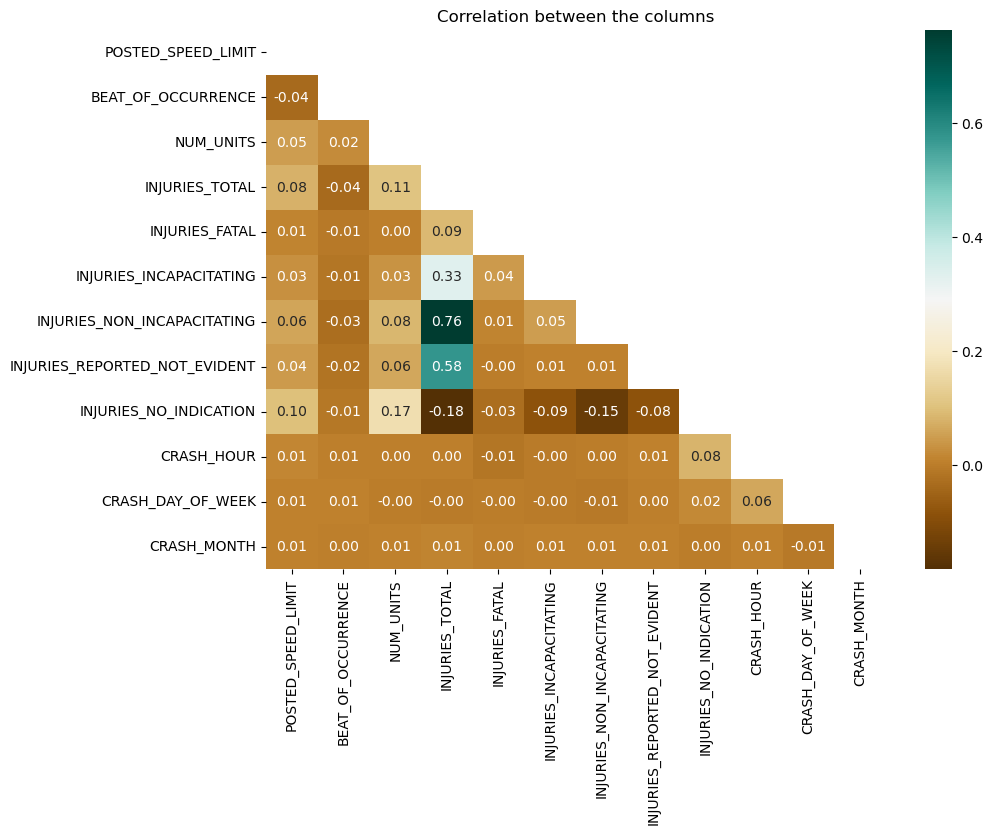

In [46]:
#correlation heatmap
plt.figure(figsize=(10,7))
mask = np.triu(np.ones_like(crashes_data.corr(), dtype=bool))
sns.heatmap(crashes_data.corr(),annot=True,cmap="BrBG",fmt=".2f", mask=mask);
plt.title('Correlation between the columns')
plt.show()


In [47]:
#inspecting values for columns
for col in crashes_data.columns:
    try:
        print(col, crashes_data[col].value_counts(dropna=False)[:10])
    except:
        print(col, crashes_data[col].value_counts())
        # If there aren't 5+ unique values for a column the first print statement
        # will throw an error for an invalid idx slice
    print('\n') # Break up the output between columns


CRASH_RECORD_ID 79c7a2ce89f446262efd86df3d72d18b04ba487024b7c42d58be7bc0ee3b2779be1916679231382b4a4bfe14200bd305d9c6feb7cd70839f863dd944b040212d    1
186b23f29f3f717b244be4026bb26daed433f1fa4bdfbe753b48ec73adafd87ef6910c9eef75ff6e5a4460767d07980b3536725f1f6b7ca1cb4b09aa20c5892b    1
1a773ef5d30370d9e3cb48696fbb0a24bc010092a99161e070ce655fb63f0bbcbca780a1af810c65706f1750bf708eec3ff21fc3551f2489d2351a28bc652bcf    1
17b35d74eddd4447eb0ce162d4dc143374c37baa096d0c243183e385e9c8bdfb9fdeb9ff691e3870e35a931b9ce4cdb64c69640bb02e6cdafd2e7cf76f57b783    1
181c049e37950b3fa20b7f7f672759cb855cee529e16bd0a10313736834000c0aca74342d460e00e2d836899a4b4a135ea72f6fbe8e97f0c364d3c793b5a03e5    1
182ebcecfc720a1ae198bfe7f63cffd3e799b95910ebc02f373bd942898e125aa02ce7d975a7715240070e4aa0c9fa0d1bf575103e7ee2c962609e649568b571    1
1a50672d19726a97defc872ebc9390a19e4b9d720d2dc5c3f12cccc50583b51a637b0abaf515bf4a0a10752a50469fa815153d24ad91a9de61ffa67ec40da318    1
189e4cc914a2dcd33d85adc05d2770152d93d68b71d3aa

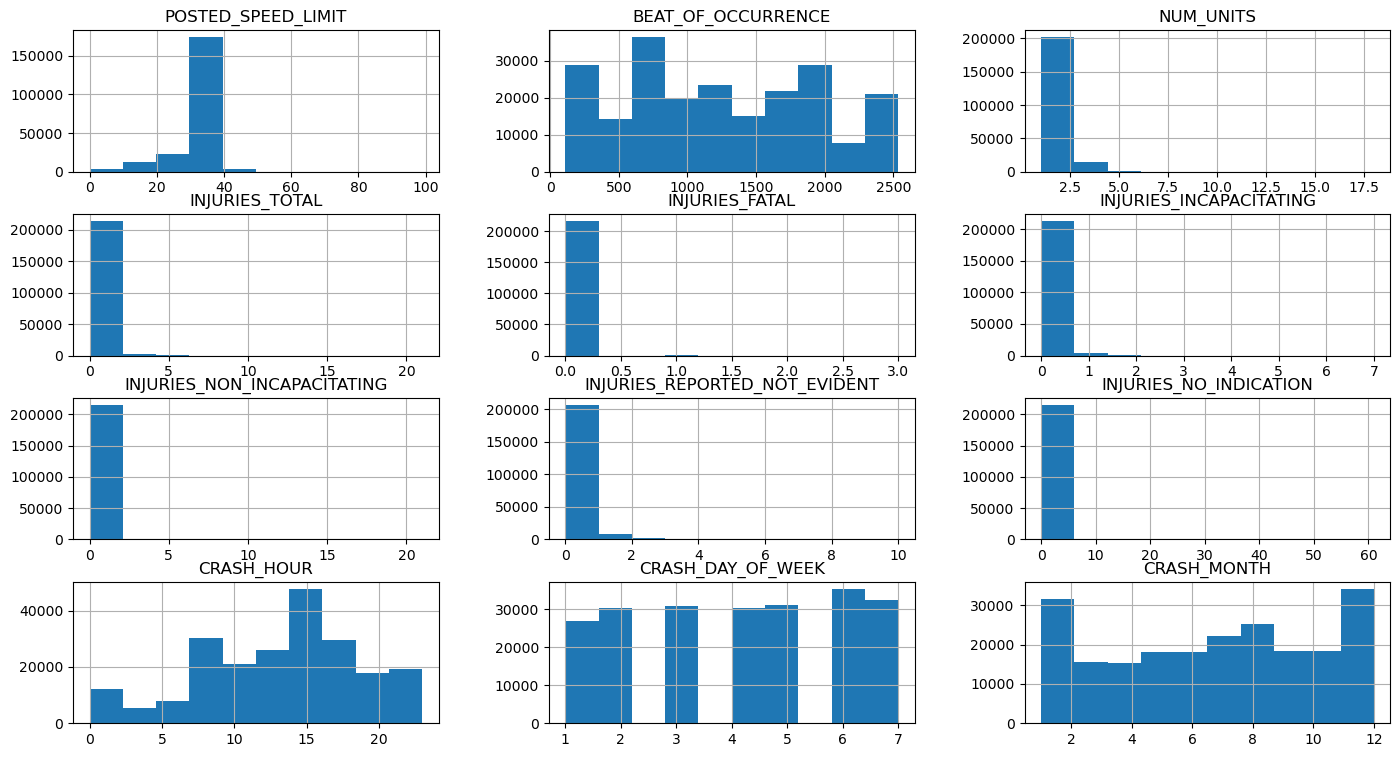

In [48]:
#cheking the distribution of numeric variables in the crashes data
# Numeric variables
crashes_data.hist(figsize=(17, 9));


In [49]:
"""
some of tha data is normal while other sets are non normal
"""

'\nsome of tha data is normal while other sets are non normal\n'

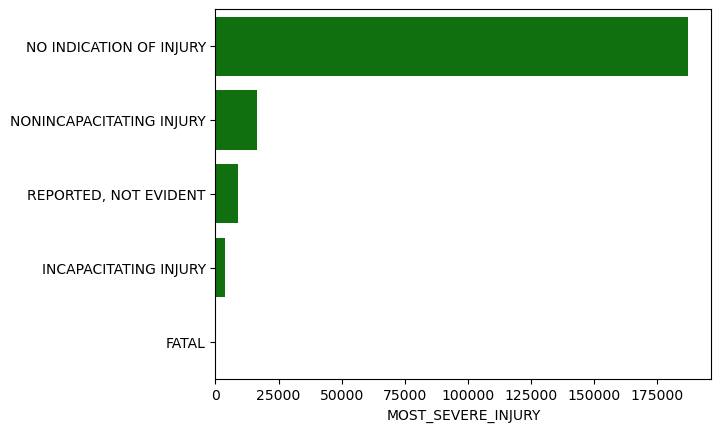

In [50]:
#a bar graph on the frequency of the categories of most severe injury
sns.barplot(y=crashes_data.MOST_SEVERE_INJURY.value_counts().index, x=crashes_data.MOST_SEVERE_INJURY.value_counts(),
           orient='h', color = 'g');

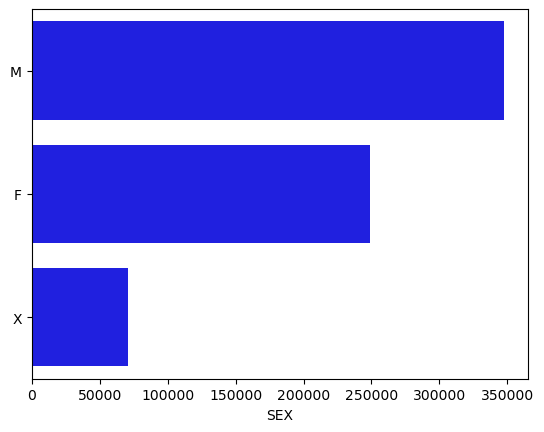

In [51]:
#assesing the gender that is most prone to accodents
sns.barplot(y=people_dataset.SEX.value_counts().index, x=people_dataset.SEX.value_counts(),
           orient='h', color = 'b');

In [52]:
pd.crosstab(people_dataset.SEX, people_dataset.INJURY_CLASSIFICATION)

INJURY_CLASSIFICATION,FATAL,INCAPACITATING INJURY,NO INDICATION,NO INDICATION OF INJURY,NONINCAPACITATING INJURY,"REPORTED, NOT EVIDENT"
SEX,,,,,,
F,106,2561,0,221420,15242,9335
M,309,3573,1,318252,16930,8489
X,4,42,0,70443,118,55


In [53]:
"""
from the graph above we can see male is the leading gender involved in crashes
"""

'\nfrom the graph above we can see male is the leading gender involved in crashes\n'

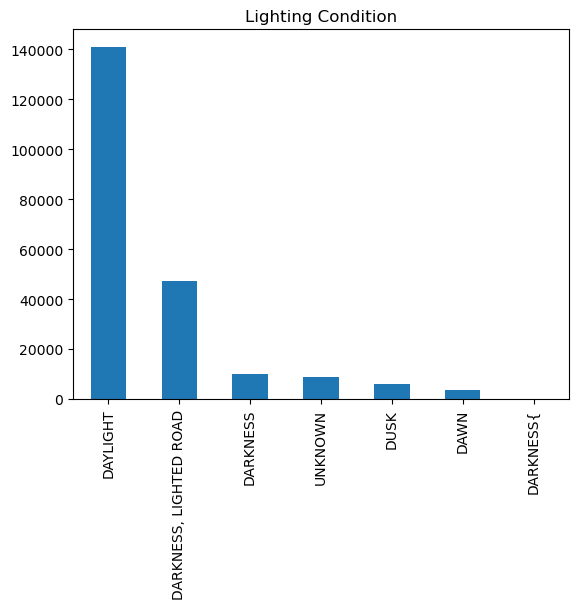

In [54]:
crashes_data.LIGHTING_CONDITION .value_counts().plot.bar()
plt.title("Lighting Condition");

In [55]:
pd.crosstab(crashes_data.LIGHTING_CONDITION, people_dataset.INJURY_CLASSIFICATION)

INJURY_CLASSIFICATION,FATAL,INCAPACITATING INJURY,NO INDICATION OF INJURY,NONINCAPACITATING INJURY,"REPORTED, NOT EVIDENT"
LIGHTING_CONDITION,,,,,
DARKNESS,3,104,9267,512,292
"DARKNESS, LIGHTED ROAD",33,490,42595,2610,1356
DARKNESS{,0,0,1,0,0
DAWN,4,38,3366,197,92
DAYLIGHT,107,1479,127582,7676,4013
DUSK,4,75,5579,313,182
UNKNOWN,9,84,8058,490,263


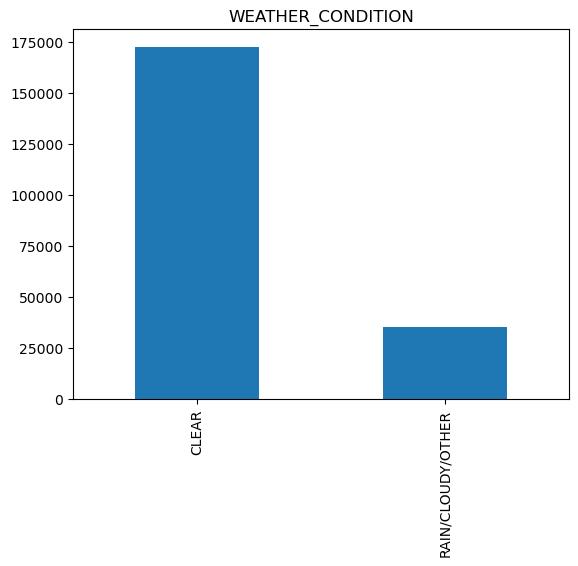

In [56]:
crashes_data.WEATHER_CONDITION .value_counts().plot.bar()
plt.title("WEATHER_CONDITION");

In [57]:
pd.crosstab(crashes_data.WEATHER_CONDITION, people_dataset.INJURY_CLASSIFICATION)

INJURY_CLASSIFICATION,FATAL,INCAPACITATING INJURY,NO INDICATION OF INJURY,NONINCAPACITATING INJURY,"REPORTED, NOT EVIDENT"
WEATHER_CONDITION,,,,,
CLEAR,125,1827,156207,9265,4927
RAIN/CLOUDY/OTHER,32,361,31897,2020,1021


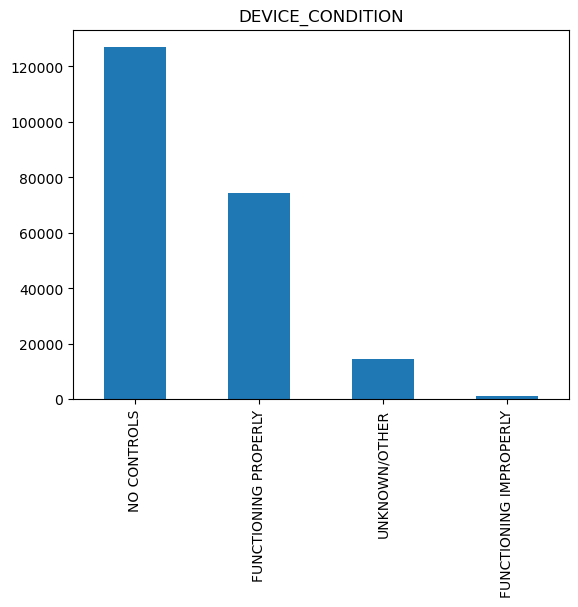

In [58]:

crashes_data.DEVICE_CONDITION.value_counts().plot.bar()
plt.title("DEVICE_CONDITION");

In [59]:
pd.crosstab(crashes_data.DEVICE_CONDITION, people_dataset.INJURY_CLASSIFICATION)

INJURY_CLASSIFICATION,FATAL,INCAPACITATING INJURY,NO INDICATION OF INJURY,NONINCAPACITATING INJURY,"REPORTED, NOT EVIDENT"
DEVICE_CONDITION,,,,,
FUNCTIONING IMPROPERLY,1,14,1004,73,32
FUNCTIONING PROPERLY,50,771,67433,4080,2146
NO CONTROLS,95,1337,114962,6901,3580
UNKNOWN/OTHER,14,148,13049,744,440


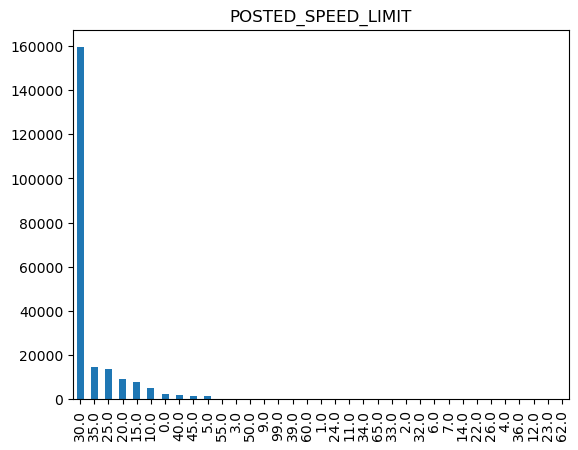

In [60]:
crashes_data.POSTED_SPEED_LIMIT.value_counts().plot.bar()
plt.title("POSTED_SPEED_LIMIT");

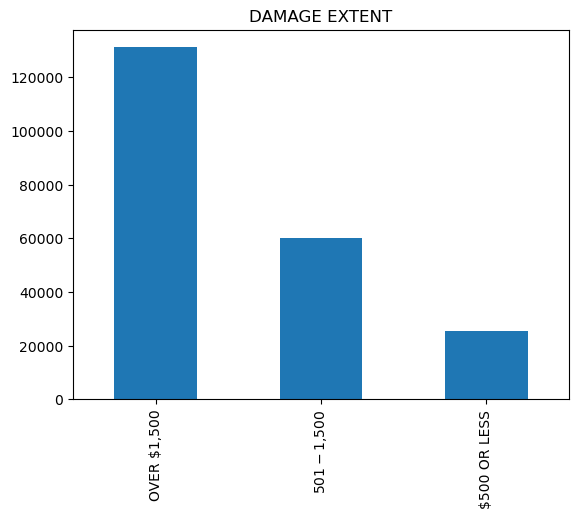

In [61]:
crashes_data.DAMAGE.value_counts().plot.bar()
plt.title("DAMAGE EXTENT");

In [62]:
"""
to avoid colineality we drop the injury columns 
"""

'\nto avoid colineality we drop the injury columns \n'

In [63]:
#crashes_data.drop(['INJURIES_TOTAL', 'INJURIES_FATAL', 'INJURIES_INCAPACITATING',
                 # 'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT',
                  #'INJURIES_NO_INDICATION', 'MOST_SEVERE_INJURY'], axis=1)

In [64]:
people_dataset.shape

(676282, 21)

In [65]:
crashes_data.shape

(216969, 28)

In [66]:
crashes_df = people_dataset.merge(crashes_data, on='CRASH_RECORD_ID', how='left')

In [67]:
crashes_df.shape

(676282, 48)

In [68]:
crashes_df.columns

Index(['PERSON_ID', 'PERSON_TYPE', 'CRASH_RECORD_ID', 'RD_NO', 'VEHICLE_ID',
       'CRASH_DATE', 'CITY', 'STATE', 'ZIPCODE', 'SEX', 'AGE',
       'DRIVERS_LICENSE_STATE', 'DRIVERS_LICENSE_CLASS', 'SAFETY_EQUIPMENT',
       'AIRBAG_DEPLOYED', 'EJECTION', 'INJURY_CLASSIFICATION', 'DRIVER_ACTION',
       'DRIVER_VISION', 'PHYSICAL_CONDITION', 'BAC_RESULT',
       'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION',
       'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE',
       'TRAFFICWAY_TYPE', 'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT',
       'CRASH_TYPE', 'DAMAGE', 'DATE_POLICE_NOTIFIED',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE',
       'BEAT_OF_OCCURRENCE', 'NUM_UNITS', 'MOST_SEVERE_INJURY',
       'INJURIES_TOTAL', 'INJURIES_FATAL', 'INJURIES_INCAPACITATING',
       'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT',
       'INJURIES_NO_INDICATION', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK',
       'CRASH_MONTH'],
      dty

In [69]:
#here we drop the columns that are not relevent to our project objectives
crash_cleaned_df = crashes_df.drop(['DATE_POLICE_NOTIFIED','MOST_SEVERE_INJURY', 'INJURIES_FATAL', 'INJURIES_INCAPACITATING',
                        'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',
                        'PERSON_ID','PERSON_TYPE','RD_NO','VEHICLE_ID','ZIPCODE', 'STATE', 'CITY',
                                   'CRASH_RECORD_ID', 'CRASH_DATE'], axis=1)

In [70]:
crash_cleaned_df['INJURIES_TOTAL'].value_counts()

0.0     179446
1.0      24520
2.0       7274
3.0       2929
4.0       1160
5.0        501
6.0        211
7.0        118
8.0         34
15.0        28
21.0        21
11.0        16
12.0        14
9.0         13
13.0        11
10.0         3
Name: INJURIES_TOTAL, dtype: int64

In [71]:
# creating classes:not injured and injured
crash_cleaned_df['INJURIES_TOTAL'] = crash_cleaned_df['INJURIES_TOTAL'].map(lambda x: "injured" if x > 0 else "not_injured")


In [72]:
#renaming our target column
crash_cleaned_df.rename(columns = {'INJURIES_TOTAL':'Injured'}, inplace = True) 

In [73]:
crash_cleaned_df['Injured'].value_counts()

not_injured    639429
injured         36853
Name: Injured, dtype: int64

In [74]:
crash_cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 676282 entries, 0 to 676281
Data columns (total 32 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   SEX                      666936 non-null  object 
 1   AGE                      470490 non-null  float64
 2   DRIVERS_LICENSE_STATE    398921 non-null  object 
 3   DRIVERS_LICENSE_CLASS    332968 non-null  object 
 4   SAFETY_EQUIPMENT         674366 non-null  object 
 5   AIRBAG_DEPLOYED          663937 non-null  object 
 6   EJECTION                 668427 non-null  object 
 7   INJURY_CLASSIFICATION    676033 non-null  object 
 8   DRIVER_ACTION            553102 non-null  object 
 9   DRIVER_VISION            552874 non-null  object 
 10  PHYSICAL_CONDITION       553436 non-null  object 
 11  BAC_RESULT               553359 non-null  object 
 12  POSTED_SPEED_LIMIT       216299 non-null  float64
 13  TRAFFIC_CONTROL_DEVICE   216130 non-null  object 
 14  DEVI

In [75]:
crash_cleaned_df = crash_cleaned_df.dropna()
crash_cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91870 entries, 0 to 676270
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SEX                      91870 non-null  object 
 1   AGE                      91870 non-null  float64
 2   DRIVERS_LICENSE_STATE    91870 non-null  object 
 3   DRIVERS_LICENSE_CLASS    91870 non-null  object 
 4   SAFETY_EQUIPMENT         91870 non-null  object 
 5   AIRBAG_DEPLOYED          91870 non-null  object 
 6   EJECTION                 91870 non-null  object 
 7   INJURY_CLASSIFICATION    91870 non-null  object 
 8   DRIVER_ACTION            91870 non-null  object 
 9   DRIVER_VISION            91870 non-null  object 
 10  PHYSICAL_CONDITION       91870 non-null  object 
 11  BAC_RESULT               91870 non-null  object 
 12  POSTED_SPEED_LIMIT       91870 non-null  float64
 13  TRAFFIC_CONTROL_DEVICE   91870 non-null  object 
 14  DEVICE_CONDITION     

In [76]:
from sklearn.preprocessing import LabelEncoder
#encoding categorical variabl
categorical_columns = crash_cleaned_df.select_dtypes(include=['object']).columns
# creating instance of label encoder
labelencoder = LabelEncoder()

for c in categorical_columns:
    crash_cleaned_df[c] = labelencoder.fit_transform(crash_cleaned_df[c])

crash_cleaned_df

,SEX,AGE,DRIVERS_LICENSE_STATE,DRIVERS_LICENSE_CLASS,SAFETY_EQUIPMENT,AIRBAG_DEPLOYED,EJECTION,INJURY_CLASSIFICATION,DRIVER_ACTION,DRIVER_VISION,...,CRASH_TYPE,DAMAGE,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,BEAT_OF_OCCURRENCE,NUM_UNITS,Injured,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH
0,1,25.0,26,42,3,4,0,2,18,12,...,1,2,35,26,1531.0,3.0,1,3.0,7.0,9.0
19,1,22.0,26,42,6,5,0,2,18,7,...,1,1,22,36,1532.0,2.0,1,0.0,4.0,5.0
36,0,70.0,26,42,8,6,0,2,18,7,...,0,2,35,26,2012.0,1.0,1,18.0,1.0,2.0
37,0,51.0,26,42,8,3,0,2,18,7,...,0,2,35,36,722.0,2.0,0,18.0,1.0,2.0
38,0,25.0,26,42,8,5,0,4,18,7,...,0,2,35,36,722.0,2.0,0,18.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
676261,1,20.0,26,42,6,5,0,2,12,7,...,1,2,22,26,224.0,2.0,1,16.0,2.0,11.0
676263,0,50.0,26,42,3,6,0,2,12,7,...,0,2,35,26,412.0,2.0,1,16.0,2.0,11.0
676265,1,49.0,26,26,6,5,0,2,12,7,...,1,2,25,26,2013.0,2.0,1,15.0,3.0,2.0
676269,1,43.0,26,42,6,5,0,2,5,7,...,1,1,19,17,912.0,2.0,1,16.0,2.0,11.0


In [77]:
#scalling our data to a normal form using stsndard scaller
#instantiating stsndardscaller package
scaler = StandardScaler()
#fitting and transforming the scaller
df_scaled = scaler.fit_transform(crash_cleaned_df[crash_cleaned_df.columns])
df_scaled = pd.DataFrame(df_scaled, columns=crash_cleaned_df.columns)
df_scaled.head()

,SEX,AGE,DRIVERS_LICENSE_STATE,DRIVERS_LICENSE_CLASS,SAFETY_EQUIPMENT,AIRBAG_DEPLOYED,EJECTION,INJURY_CLASSIFICATION,DRIVER_ACTION,DRIVER_VISION,...,CRASH_TYPE,DAMAGE,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,BEAT_OF_OCCURRENCE,NUM_UNITS,Injured,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH
0,0.819906,-0.953633,-0.120869,0.160251,-3.134509,-0.842508,-0.136114,-0.233570,1.471922,1.461783,...,0.670115,0.665195,1.223050,-0.200009,0.399086,1.829137,0.443007,-2.017385,1.446851,0.687079
1,0.819906,-1.142143,-0.120869,0.160251,-0.489371,0.077741,-0.136114,-0.233570,1.471922,-0.667880,...,0.670115,-0.851707,-0.217635,1.085144,0.400516,-0.203188,0.443007,-2.592736,-0.085464,-0.514163
2,-1.209699,1.874007,-0.120869,0.160251,1.274054,0.997990,-0.136114,-0.233570,1.471922,-0.667880,...,-1.492282,0.665195,1.223050,-0.200009,1.086739,-2.235513,0.443007,0.859369,-1.617779,-1.415094
3,-1.209699,0.680115,-0.120869,0.160251,1.274054,-1.762757,-0.136114,-0.233570,1.471922,-0.667880,...,-1.492282,0.665195,1.223050,1.085144,-0.757486,-0.203188,-2.257301,0.859369,-1.617779,-1.415094
4,-1.209699,-0.953633,-0.120869,0.160251,1.274054,0.077741,-0.136114,4.741636,1.471922,-0.667880,...,-1.492282,0.665195,1.223050,1.085144,-0.757486,-0.203188,-2.257301,0.859369,-1.617779,-1.415094


# Train and Split

In [78]:
#defining the target and predicter variables
X = crash_cleaned_df.drop(labels="Injured", axis = 1)
y = crash_cleaned_df["Injured"]

In [79]:
#splitting our data into test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 , random_state = 42)

In [80]:
# Apply SMOTE to the training set
smote = SMOTE(sampling_strategy='minority', random_state=0)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [81]:
crashes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216969 entries, 0 to 216968
Data columns (total 28 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                216969 non-null  object 
 1   POSTED_SPEED_LIMIT             216965 non-null  float64
 2   TRAFFIC_CONTROL_DEVICE         216824 non-null  object 
 3   DEVICE_CONDITION               216965 non-null  object 
 4   WEATHER_CONDITION              207772 non-null  object 
 5   LIGHTING_CONDITION             216965 non-null  object 
 6   FIRST_CRASH_TYPE               211790 non-null  object 
 7   TRAFFICWAY_TYPE                214996 non-null  object 
 8   ALIGNMENT                      216964 non-null  object 
 9   ROADWAY_SURFACE_COND           216964 non-null  object 
 10  ROAD_DEFECT                    214058 non-null  object 
 11  CRASH_TYPE                     216964 non-null  object 
 12  DAMAGE                        

# Using Pipeline and function Transformer

In [82]:
#will throw this mini pipeline into our column transformer
#subpipe_num = Pipeline(steps = [('num_impute', SimpleImputer()),
  #                             ('ss', StandardScaler())])
#subpipe_cat = Pipeline(steps = [('cat_impute', SimpleImputer(strategy='most_frequent')),
         #                      ('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore'))])

In [83]:
#number = crash_cleaned_df.columns.to_frame()
#number = number.reset_index()

In [84]:
#the remainder "passthrough" will let the compiler to leave 
#the other df column is unchanged
#most of the columns here fall under the cartegorical type
#CT = ColumnTransformer(transformers=[('subpipe_num', subpipe_num,[2,12,26,27,29,30,31]),
 #                                   ('subpipe_cat', subpipe_cat, [0,1,3,4,5,6,7,8,9,10,11,13,14,15,16,17,
  #                                                               18,19,20,21,22,23,24,25,27,28])],
   #                   remainder= 'passthrough')

In [85]:
#since the column transformer has taken care of the preprocessing,
#we now do a model with the fillowing pipeline 
#tree_clf__model_pipe = Pipeline(steps = [('ct', CT),
 #                                    ('tree_clf', DecisionTreeClassifier(criterion='gini', max_depth=5))])

In [86]:
#now we fit the data into our model for training
#tree_clf__model_pipe.fit(X_train, y_train)

In [87]:
y_train.value_counts().sum()

122826

In [88]:
X_train.sum()

SEX                        6.039300e+04
AGE                        4.896281e+06
DRIVERS_LICENSE_STATE      3.269075e+06
DRIVERS_LICENSE_CLASS      5.044391e+06
SAFETY_EQUIPMENT           7.977180e+05
AIRBAG_DEPLOYED            5.568000e+05
EJECTION                   8.178000e+03
INJURY_CLASSIFICATION      2.661350e+05
DRIVER_ACTION              1.398512e+06
DRIVER_VISION              1.044217e+06
PHYSICAL_CONDITION         1.010833e+06
BAC_RESULT                 3.878000e+03
POSTED_SPEED_LIMIT         3.627174e+06
TRAFFIC_CONTROL_DEVICE     3.230340e+05
DEVICE_CONDITION           1.797040e+05
WEATHER_CONDITION          1.376400e+04
LIGHTING_CONDITION         2.985360e+05
FIRST_CRASH_TYPE           4.294780e+05
TRAFFICWAY_TYPE            2.691190e+05
ALIGNMENT                  3.681190e+05
ROADWAY_SURFACE_COND       1.259010e+05
ROAD_DEFECT                1.312900e+04
CRASH_TYPE                 5.066700e+04
DAMAGE                     1.936280e+05
PRIM_CONTRIBUTORY_CAUSE    2.842989e+06


# BASELINE MODEL

## baseline decison tree model

In [90]:
#instsntiating a decision tree classification model
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=5) 
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [91]:
#checking for the accuracy of our model
#making a prediction
y_pred = tree_clf.predict(X_test)
#instsntiatiing accuracy
accuracy = accuracy_score(y_test, y_pred)
#print the accuracy
print('Accuracy:', accuracy)

Accuracy: 0.8564275606835746


In [92]:
from sklearn.metrics import roc_curve, auc
# Check the AUC of predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9138628008036834

Our decision tree baseline model achieved an accuracy score of 0.86 and an AUC score of 0.91, indicating good overall classification and ability to distinguish between classes.

## hyperparameter tuning and pruning

Hyperparameter tuning and pruning are crucial steps in optimizing the performance of decision tree models. By adjusting parameters such as max depth, min sample split, min sample leaf, and max features, we can fine-tune the model's complexity, reduce overfitting, and improve its accuracy and ability to generalize to new data.

### Maximum Tree Depth

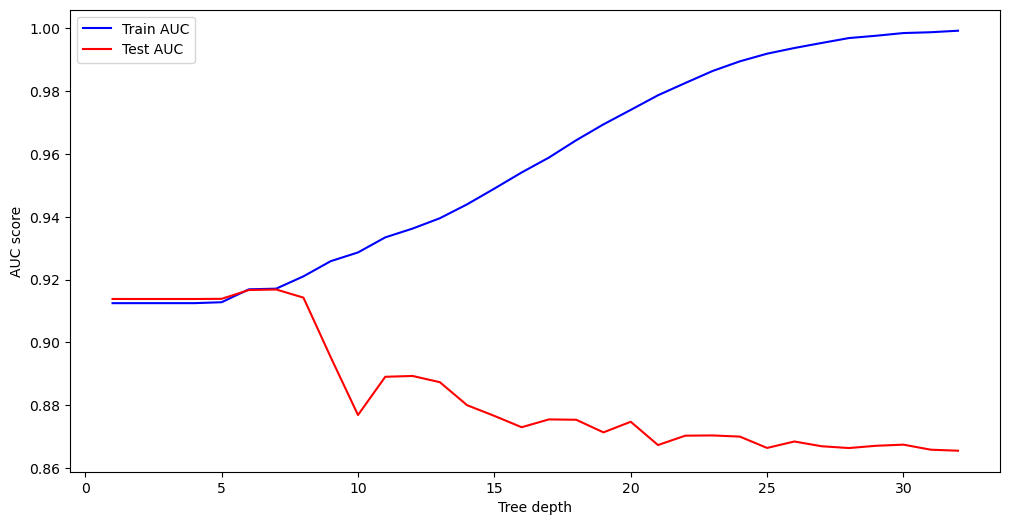

In [93]:
# Identify the optimal tree depth for given data
max_depths = list(range(1, 33))
train_results = []
test_results = []
for max_depth in max_depths:
    dt = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=42)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous train results
    train_results.append(roc_auc)
    y_pred = dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous test results
    test_results.append(roc_auc)

plt.figure(figsize=(12,6))
plt.plot(max_depths, train_results, 'b', label='Train AUC')
plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.legend()
plt.show()

## Minimum Sample Split

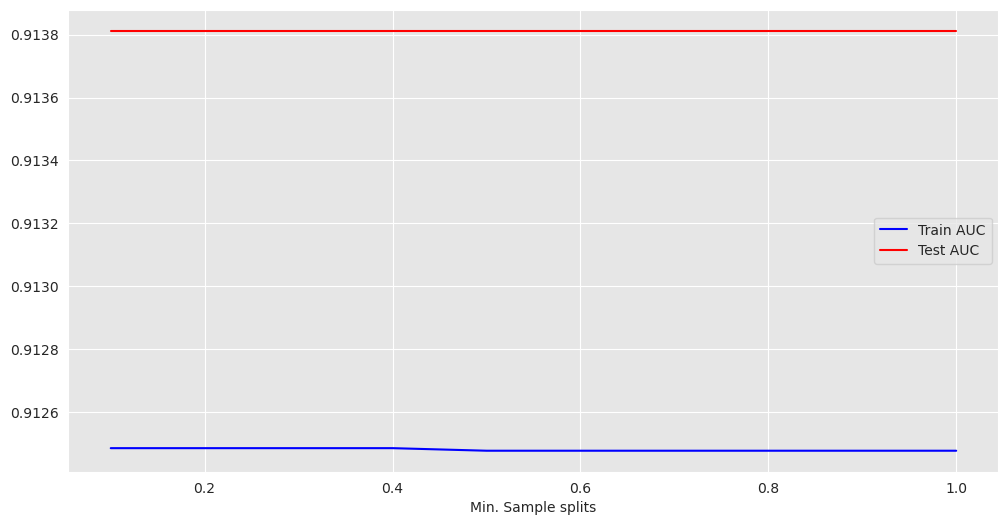

In [128]:
from sklearn.metrics import auc
# Identify the optimal min-samples-split for given data
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
    dt = DecisionTreeClassifier(criterion='entropy', min_samples_split=min_samples_split, random_state=42)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds =    roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

plt.figure(figsize=(12,6))
plt.plot(min_samples_splits, train_results, 'b', label='Train AUC')
plt.plot(min_samples_splits, test_results, 'r', label='Test AUC')
plt.xlabel('Min. Sample splits')
plt.legend()
plt.show()

## Minimum Sample Leafs

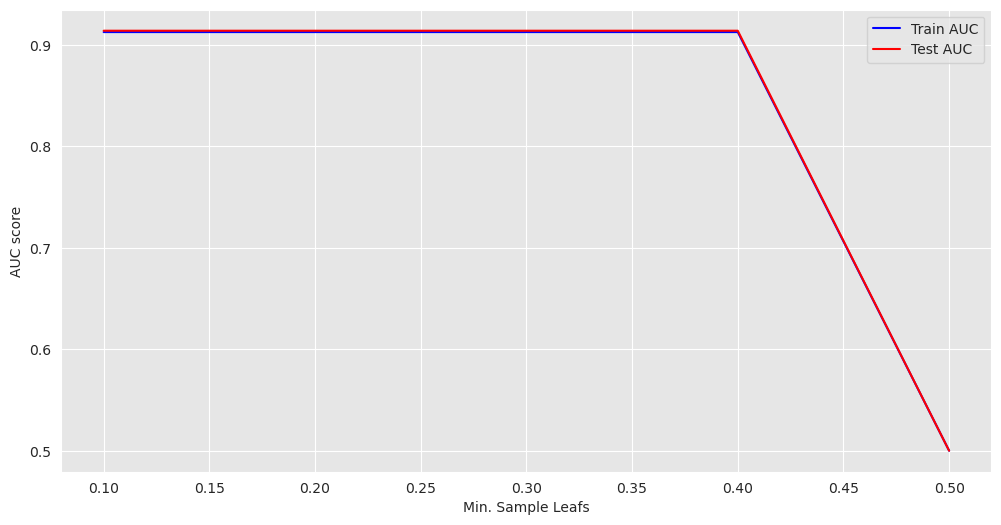

In [129]:
# Calculate the optimal value for minimum sample leafs
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
    dt = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=min_samples_leaf, random_state=42)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
    
plt.figure(figsize=(12,6))    
plt.plot(min_samples_leafs, train_results, 'b', label='Train AUC')
plt.plot(min_samples_leafs, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Min. Sample Leafs')
plt.legend()
plt.show()

## Maximum Features

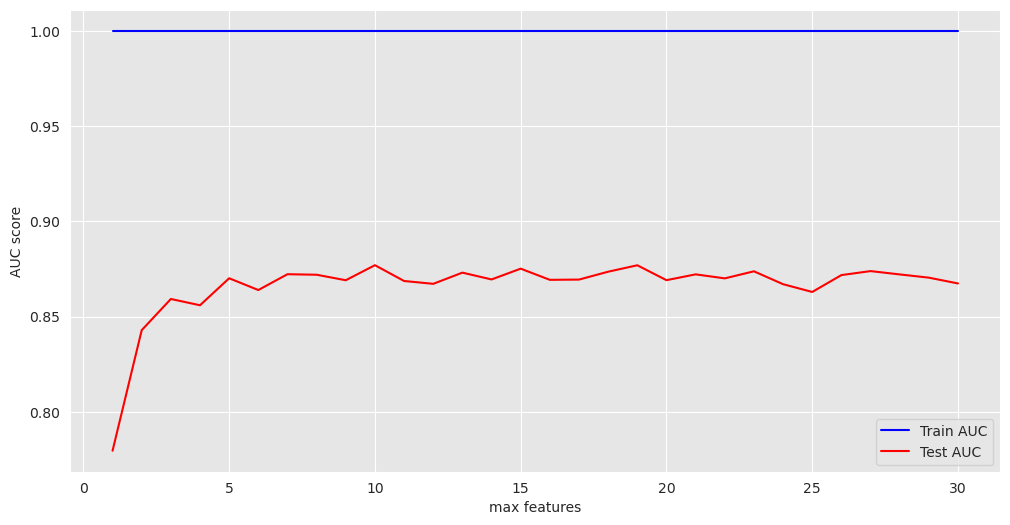

In [132]:
# Find the best value for optimal maximum feature size
max_features = list(range(1, X_train.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
    dt = DecisionTreeClassifier(criterion='entropy', max_features=max_feature, random_state=42)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

plt.figure(figsize=(12,6))
plt.plot(max_features, train_results, 'b', label='Train AUC')
plt.plot(max_features, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('max features')
plt.legend()
plt.show()

we can see the max fratures are highest at 18

### Tuned decision tree model

In [139]:
# Train a classifier with optimal values identified above
dt = DecisionTreeClassifier(criterion='entropy',
                           max_depth=7,
                           min_samples_split=0.2,
                           min_samples_leaf=0.4,
                            max_features=18,
                           random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)


In [138]:
#instsntiatiing accuracy
accuracy = accuracy_score(y_test, y_pred)
#print the accuracy
print('Accuracy:', accuracy)

Accuracy: 0.8556656144552085


AUC: 0.9138121546961326


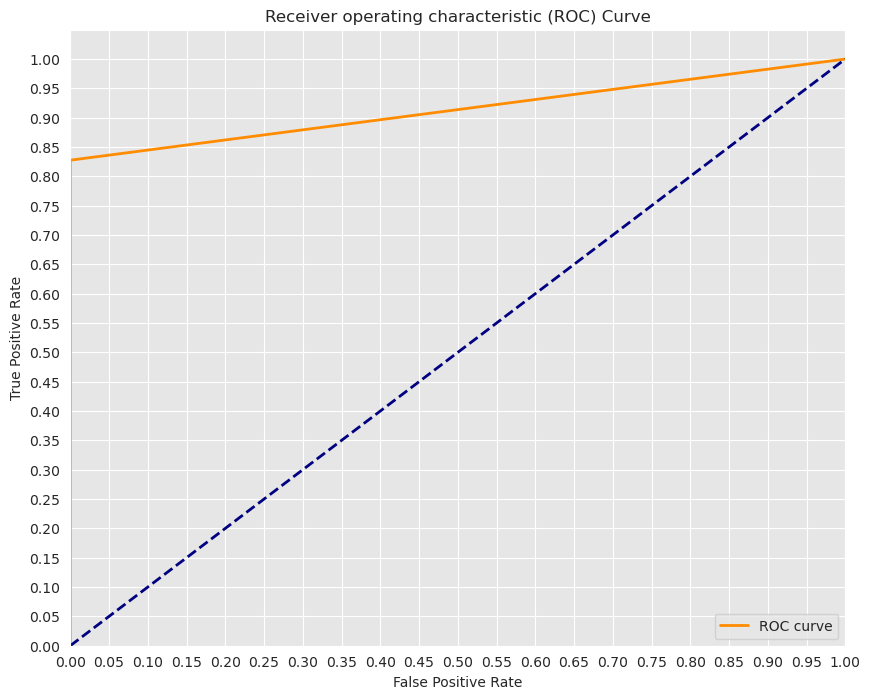

In [137]:
from sklearn.metrics import roc_curve, auc
# Seaborn's beautiful styling
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

# Print AUC
print('AUC: {}'.format(auc(fpr, tpr)))

# Plot the ROC curve
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

The final decision tree classifier achieved a good balance of accuracy and ability to distinguish between classes, with an accuracy score of 0.86 and an AUC score of 0.91. This indicates a solid performance in overall classification and good discrimination ability.


## Logistic Regression

### Baseline Model

In [97]:
#instsntiating alogistic regression model
logreg = LogisticRegression()
#fitting the logistic regression model
logreg.fit(X_train, y_train)
#making a prediction on the test set
y_pred = logreg.predict(X_test)
#get the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8086426472188962


In [98]:
# Check the AUC of predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7632170738053395

The baseline logistic regression model had an accuracy score of 0.81 and an AUC score of 0.76, indicating moderate overall classification and limited ability to distinguish between classes.


## Hyperparameter Tuning and Pruning

In [99]:
#instsntiating a logistic regression model with l2 regularization 
logreg2 = LogisticRegression(penalty = 'l2')
logreg2.fit(X_train, y_train)

LogisticRegression()

In [100]:
# Make predictions on the test set
y_pred = logreg2.predict(X_test)
# Get the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.8086426472188962


the model has not improved by much now let us try and add a hyperparameter tuning to the model

In [101]:
# Check the AUC of predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7632170738053395

In [102]:
#define the hyperparameters to tune
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000], 'penalty':['l1', 'l2']}

In [103]:
#training the a logistic regression model with hyperparameter tuning 
logreg3 = LogisticRegression( solver = 'saga', penalty="elasticnet", C=1e5, l1_ratio=0)
grid = GridSearchCV(logreg3, param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(C=100000.0, l1_ratio=0,
                                          penalty='elasticnet', solver='saga'),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']})

In [104]:
# Get the best hyperparameters
best_params = grid.best_params_
print('Best hyperparameters:', best_params)

Best hyperparameters: {'C': 0.01, 'penalty': 'l1'}


In [105]:
# Make predictions on the test set
y_pred = grid.predict(X_test)

# Get the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.8375421791662131


In [107]:
y_score = logreg3.fit(X_train, y_train).decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_score)

AUC: 0.8634964537395431


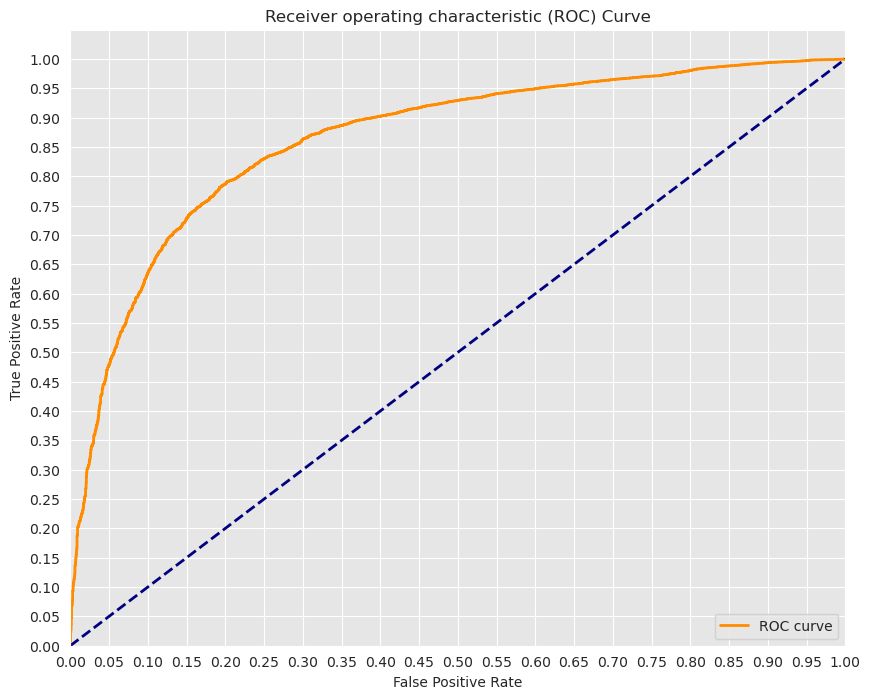

In [108]:
# Seaborn's beautiful styling
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

# Print AUC
print('AUC: {}'.format(auc(fpr, tpr)))

# Plot the ROC curve
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

The tuned logistic regression model achieved a better balance of accuracy and AUC score compared to the baseline model, with an accuracy score of 0.84 and an AUC score of 0.86. This indicates a moderate improvement in overall classification and the model's ability to distinguish between classes.

## KNN

### KNN Baseline Model 

The log loss function is an appropriate metric for evaluating the performance of KNN models. Unlike accuracy, it takes into account the confidence of the model's predictions, penalizing more for incorrect predictions with higher probabilities. This provides a better indication of the model's precision and helps optimize for better classification.


In [111]:
baseline_knn = KNeighborsClassifier()

baseline_knn_log_loss = -cross_val_score(baseline_knn, X_train, y_train, scoring="neg_log_loss").mean()
baseline_knn_log_loss

1.5983163903421727

### KNN2

In [113]:
knn_second_model = KNeighborsClassifier(n_neighbors=50)

knn_second_log_loss = -cross_val_score(knn_second_model, X_train, y_train, scoring="neg_log_loss").mean()
knn_second_log_loss

0.6043266201867057

### KNN3

In [114]:
knn_third_model = KNeighborsClassifier(n_neighbors=50, metric="manhattan")

knn_third_log_loss = -cross_val_score(knn_third_model, X_train, y_train, scoring="neg_log_loss").mean()
knn_third_log_loss

0.48098702133555743

### KNN4

In [115]:
knn_fourth_model = KNeighborsClassifier(n_neighbors=75, metric="manhattan")

knn_fourth_log_loss = -cross_val_score(knn_fourth_model, X_train, y_train, scoring="neg_log_loss").mean()
knn_fourth_log_loss

0.511122615075194

### Final KNN Model Evaluation

As observed KNN3 is our best model. To further evaluate the KNN3 model, we should also look at other performance metrics such as accuracy, precision, recall, and F1 score. It is also important to check if the model is overfitting or underfitting, and to conduct cross-validation to ensure that the model's performance is consistent across different subsets of the data. Additionally, we should also consider the interpretability of the model and whether it meets the requirements of the problem at hand.


In [116]:
#
final_model = KNeighborsClassifier(n_neighbors=50, metric="manhattan")

# Fit the model on the full training data
final_model.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=50)

In [143]:
scores = cross_val_score(final_model, X_train, y_train, cv=5, scoring='accuracy')
print("Mean accuracy:", scores.mean())

Mean accuracy: 0.8006126571405385


AUC: 0.9138121546961326


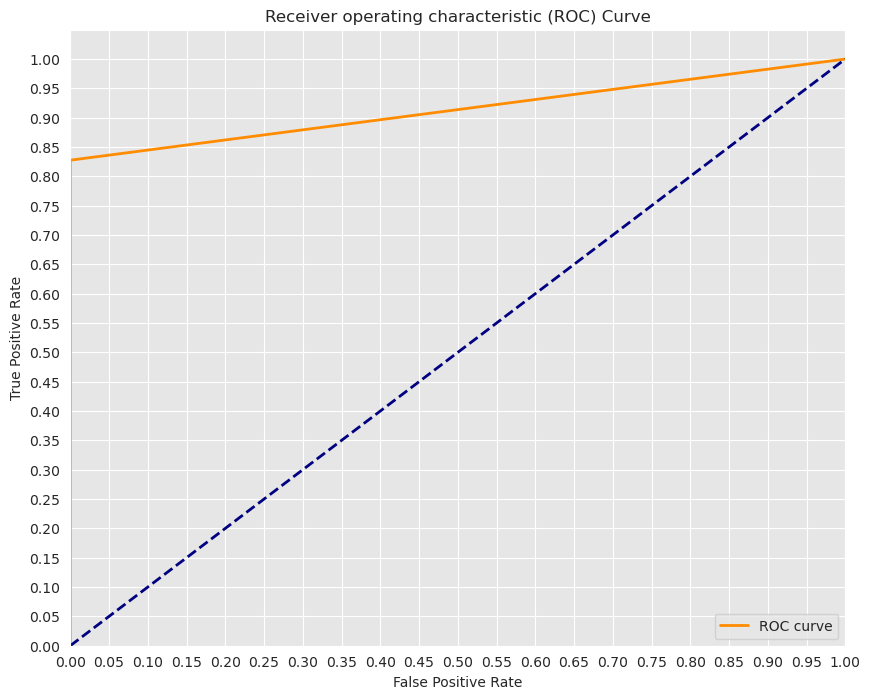

In [140]:
# Seaborn's beautiful styling
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

# Print AUC
print('AUC: {}'.format(auc(fpr, tpr)))

# Plot the ROC curve
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

The final KNN model with manhattan distance and n_neighbors=50 achieved a decent accuracy score of 0.800 and AUC score of 0.914. The model's performance was further evaluated using 10-fold cross-validation, indicating consistent and reliable performance.


## Our Final Model

Based on the performance metrics, the decision tree model is the best performing model with an accuracy of 0.856 and an AUC score of 0.914. It has the highest accuracy and AUC score compared to the KNN and Logistic Regression models. The KNN model has a lower accuracy and AUC score compared to the other two models. The Logistic Regression model has a decent accuracy score of 0.838 but has a lower AUC score of 0.863. However, the choice of the most appropriate model depends on the specific problem at hand and the trade-offs between different performance metrics. In this case, if the objective is to maximize accuracy and AUC score, the decision tree model is the best choice.
